In [1]:
%run Raw_v2.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       23158 non-null  int64 
 1   Date Of Incident           23158 non-null  object
 2   Route                      23158 non-null  object
 3   Operator                   23158 non-null  object
 4   Group Name                 23158 non-null  object
 5   Bus Garage                 23158 non-null  object
 6   Borough                    23158 non-null  object
 7   Injury Result Description  23158 non-null  object
 8   Incident Event Type        23158 non-null  object
 9   Victim Category            23158 non-null  object
 10  Victims Sex                23158 non-null  object
 11  Victims Age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


In [2]:
# df.to_excel('output.xlsx')

In [2]:
df.head(3)

,Year,month,Route,Operator,Group_Name,Bus_Garage,Borough,Injury_Result_Description,Incident_Event_Type,Victim_Category,Victims_Sex,Victims_Age
0,2015,Jan,1,London General,Go-Ahead,NaN,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,Jan,4,Metroline,Metroline,NaN,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,Jan,5,East London,Stagecoach,NaN,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly


In [3]:
df.Victim_Category.value_counts()

Passenger                      18828
Pedestrian                      1612
Bus Driver                      1484
3rd Party driver / Occupant      573
Cyclist                          275
Member Of Public                 127
Motorcyclist                     102
Operational Staff                 59
Cyclist                           33
Conductor                         28
Other                             16
Contractor Staff                   6
TfL Staff                          4
Non-Operational Staff              4
Motorcyclist                       4
Insufficient Data                  2
Operations staff (other)           1
Name: Victim_Category, dtype: int64

In [4]:
df.Victim_Category.unique()

array(['Passenger', 'Pedestrian', 'Conductor', 'Bus Driver',
       'Member Of Public', 'Cyclist', 'Motorcyclist',
       '3rd Party driver / Occupant', 'Other', 'Non-Operational Staff',
       'Operational Staff', 'Contractor Staff', 'TfL Staff',
       'Operations staff (other)', 'Cyclist ', 'Motorcyclist ',
       'Insufficient Data'], dtype=object)

In [5]:
df.Victim_Category.replace('Cyclist ','Cyclist', inplace=True)

In [6]:
df.Victim_Category.replace('Motorcyclist ','Motorcyclist', inplace=True)

In [7]:
df.Victim_Category.value_counts()

Passenger                      18828
Pedestrian                      1612
Bus Driver                      1484
3rd Party driver / Occupant      573
Cyclist                          308
Member Of Public                 127
Motorcyclist                     106
Operational Staff                 59
Conductor                         28
Other                             16
Contractor Staff                   6
Non-Operational Staff              4
TfL Staff                          4
Insufficient Data                  2
Operations staff (other)           1
Name: Victim_Category, dtype: int64

<AxesSubplot:ylabel='Frequency'>

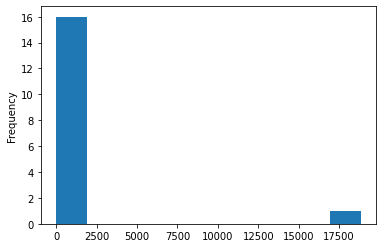

---
## Data Visualization

Overall graph Incident by Sex

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

Text(0.5, 8.95999999999998, '')

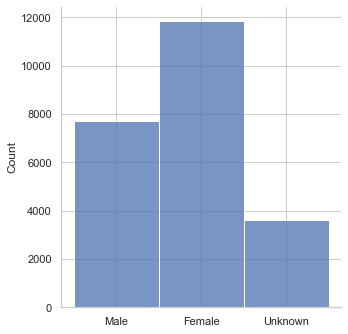

In [9]:
sns.displot(data=df,x='Victims_Sex')
plt.xlabel('')

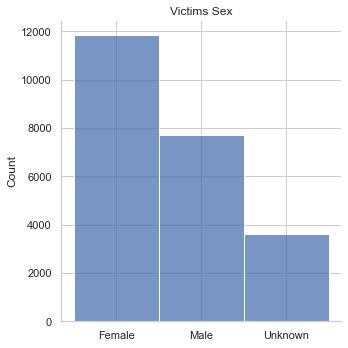

In [10]:
ax = sns.displot(data=df.sort_values(['Victims_Sex']).reset_index(drop=True),x='Victims_Sex')

plt.xlabel('')
ax.set(title='Victims Sex')

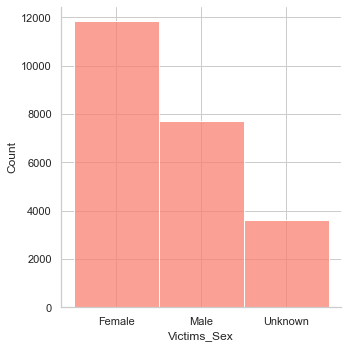

In [11]:
sns.set_palette(sns.color_palette('dark:salmon_r'))
ax = sns.displot(data=df.sort_values(['Victims_Sex']).reset_index(drop=True),x='Victims_Sex')

# plt.xlabel('')
# ax.set(title='Victims Sex')

<AxesSubplot:ylabel='Victims_Sex'>

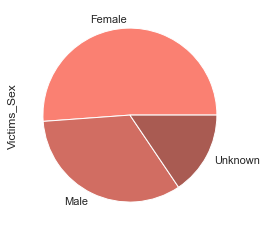

In [12]:
df.Victims_Sex.value_counts().plot.pie()

Text(0.5, 1.0, 'Victims Sex')

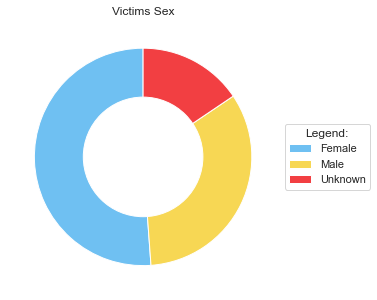

In [13]:
colors = ('#6FC0F2','#F7D754','#F23F42')

data=df['Victims_Sex'].value_counts()

fig, ax = plt.subplots(figsize =(10, 5))

# Plot Pie
ax.pie(data, startangle = 90, colors = colors)

# Adding legend
legend = ['Female','Male', 'Unknown']
ax.legend(legend,
          title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle((0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

# Add Title
ax.set_title("Victims Sex")

# plt.savefig('./Img/Victims Sex Overall.png', dpi=1200)

In [14]:
all_percentual = list((df.groupby('Victims_Sex')['Victims_Sex']).count())/df.Victims_Sex.count().sum()
all_percentual = (all_percentual*100).round(2)
all_percentual

array([51.16, 33.29, 15.55])

In [15]:
n = df.groupby('Victims_Sex')['Victims_Age'].value_counts().unstack()
n

Victims_Age,Adult,Child,Elderly,Unknown,Youth
Victims_Sex,,,,,
Female,6168,873,1879,2757,170
Male,4427,796,866,1487,133
Unknown,159,512,24,2891,16


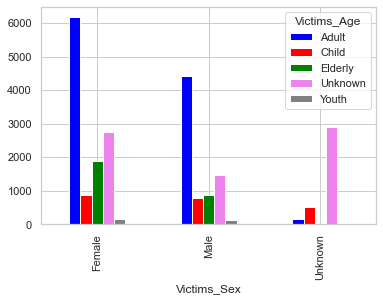

In [28]:
_ = n.plot.bar(color=['blue', 'red', 'green', 'violet', 'grey'])

<AxesSubplot:ylabel='Victims_Age'>

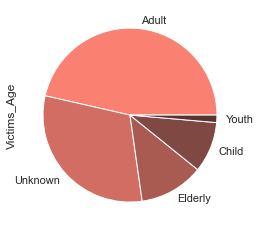

In [16]:
df.Victims_Age.value_counts().plot.pie()

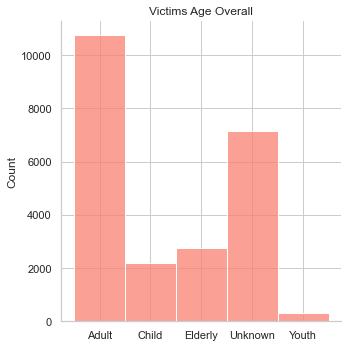

In [17]:
sns.set_palette(sns.color_palette('dark:salmon_r'))
ax1 = sns.displot(data=df.sort_values(['Victims_Age']).reset_index(drop=True),x='Victims_Age')

plt.xlabel('')
ax1.set(title='Victims Age Overall')

[Text(0.5, 1.0, 'Victims Age Overall')]

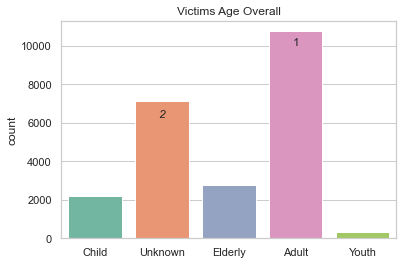

In [18]:
ax = sns.countplot(x='Victims_Age',data=df, palette = "Set2")
plt.text(0.3, 0.57, '2', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, style='italic')
plt.text(0.7, 0.9, '1', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.xlabel('')
ax.set(title='Victims Age Overall')